Load and Clean Basic Structure

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df = pd.read_csv('../data/first_order_df.csv')

# Drop unnecessary index column
df = df.drop(columns=['Unnamed: 0'])

# Convert TimeStamp from Unix epoch to datetime
df['DateTime'] = pd.to_datetime(df['TimeStamp'], unit='s')

# Preview cleaned data
df.head()

,TxHash,BlockHeight,TimeStamp,From,To,Value,isError,DateTime
0,0xaca3850ba0080cf47b47f80e46da452f61bcbb5470d3...,5848095,1529873859,0x16f209b5332a1b4fa5bf19497ca40154c5db2f85,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.500000,0,2018-06-24 20:57:39
1,0x95681862f9778e49caecf603dd911d6ed57f7799d89d...,5848181,1529875104,0xe7e07e44ee315b5f2d076340b2b7a5cc9a4ee57b,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.001020,0,2018-06-24 21:18:24
2,0x716ae3961b50186a0bbc272cfcc4555662f7fe33550f...,5848716,1529883192,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.500390,0,2018-06-24 23:33:12
3,0xf397197b800d6cc055a4db265b5e9df3dd2aa745c813...,5849038,1529887684,0x0681d8db095565fe8a346fa0277bffde9c0edbbf,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.817800,0,2018-06-25 00:48:04
4,0x7f8086011a32f128dba57fe06fc5f4a181d2f5401e5a...,5849437,1529893144,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0xe892875b87b94c44edf0e91ee9f49d0525fadd83,0.817506,0,2018-06-25 02:19:04


Basic Dataset Statistics

In [3]:
# Summary statistics
print("Dataset Shape:", df.shape)
print("\nValue Distribution in 'isError':")
print(df['isError'].value_counts())

print("\nBasic Stats for 'Value':")
print(df['Value'].describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (254973, 8)

Value Distribution in 'isError':
isError
0    239339
1     15634
Name: count, dtype: int64

Basic Stats for 'Value':
count    254973.000000
mean          4.784175
std         207.403848
min           0.000000
25%           0.000000
50%           0.012500
75%           0.500000
max       25533.614518
Name: Value, dtype: float64

Missing Values:
TxHash           0
BlockHeight      0
TimeStamp        0
From             0
To             331
Value            0
isError          0
DateTime         0
dtype: int64


Temporal Analysis – Transaction Volume Over Time


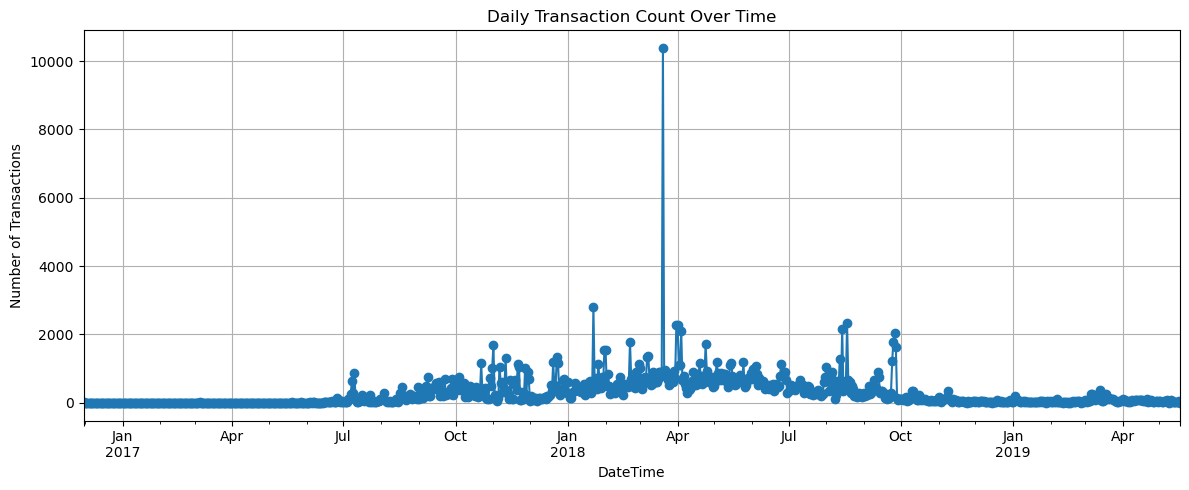

In [4]:
plt.figure(figsize=(12, 5))
df.set_index('DateTime').resample('D')['TxHash'].count().plot(kind='line', marker='o')
plt.title('Daily Transaction Count Over Time')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

Distribution of Transaction Values

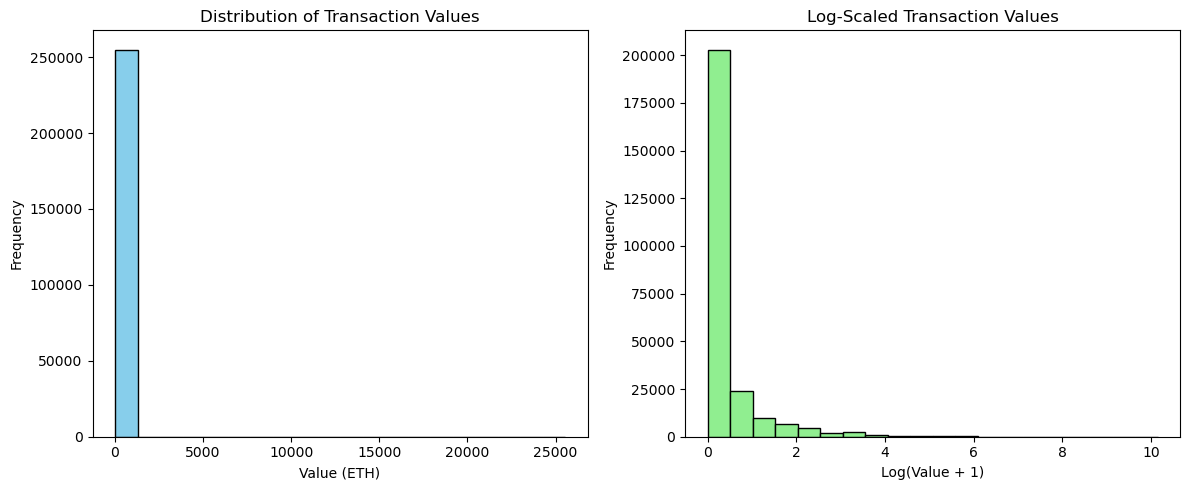

In [6]:
plt.figure(figsize=(12, 5))

# Histogram (log scale due to skewness)
plt.subplot(1, 2, 1)
plt.hist(df['Value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Values')
plt.xlabel('Value (ETH)')
plt.ylabel('Frequency')

# Log-scale histogram
plt.subplot(1, 2, 2)
df['LogValue'] = np.log1p(df['Value'])  # log(1 + x) to handle zeros
plt.hist(df['LogValue'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Log-Scaled Transaction Values')
plt.xlabel('Log(Value + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Top Senders (From) and Receivers (To)

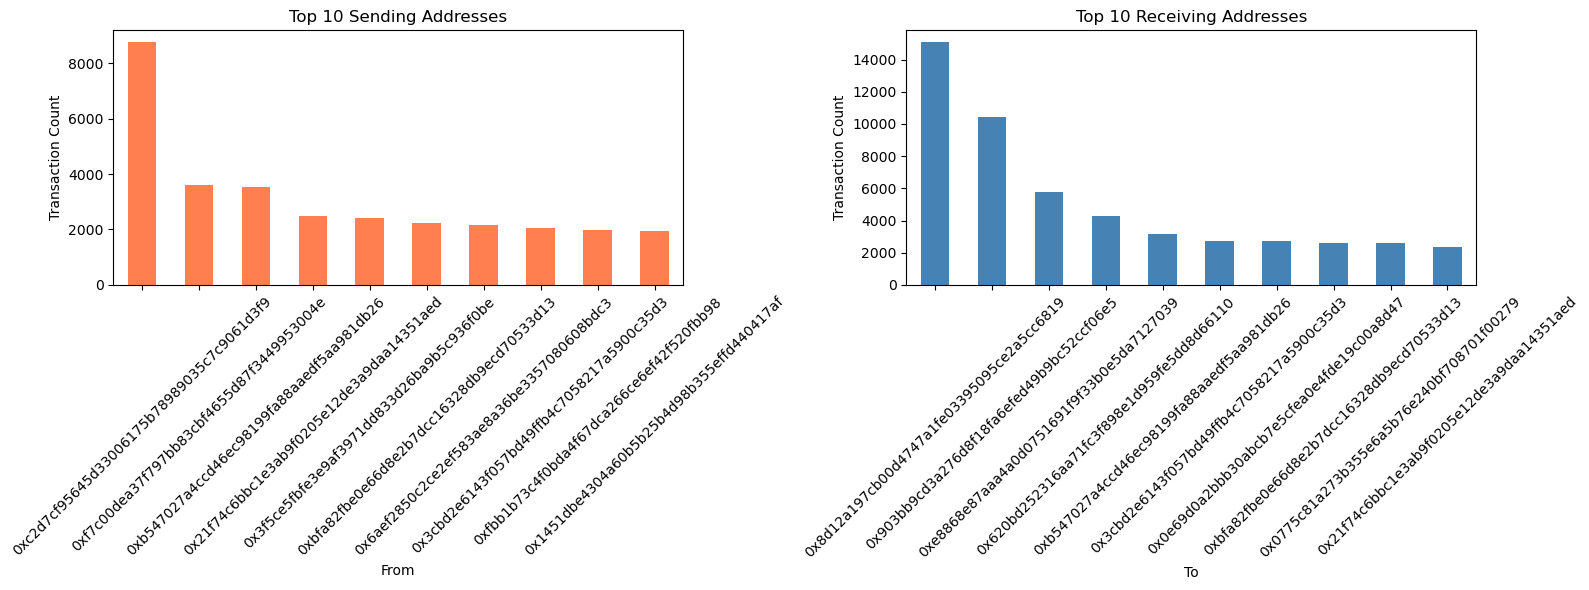

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 senders
top_from = df['From'].value_counts().head(10)
top_from.plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title('Top 10 Sending Addresses')
axes[0].set_ylabel('Transaction Count')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 receivers
top_to = df['To'].value_counts().head(10)
top_to.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Top 10 Receiving Addresses')
axes[1].set_ylabel('Transaction Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Interaction Between From and To – Bipartite Graph Insight (Simplified)

Most Frequent Transaction Pairs:
                                             From  \
48468  0xc2d7cf95645d33006175b78989035c7c9061d3f9   
60193  0xf7c00dea37f797bb83cbf4655d87f3449953004e   
47630  0xbfa82fbe0e66d8e2b7dcc16328db9ecd70533d13   
48456  0xc2d7cf95645d33006175b78989035c7c9061d3f9   
48453  0xc2d7cf95645d33006175b78989035c7c9061d3f9   
28915  0x6aef2850c2ce2ef583ae8a36be3357080608bdc3   
59194  0xf2bad87c0d0ea8bda69c722368df4f79d92ee6c9   
44177  0xb00548770ea87482f024cd4292a975fea72e8f01   
4950   0x1451dbe4304a60b5b25b4d98b355effd440417af   
29863  0x6f931bac260e7fcbaa0244d3b43a2bd9e9acf698   

                                               To  Count  
48468  0x620bd252316aa71fc3f898e1d959fe5dd8d66110   4277  
60193  0x0775c81a273b355e6a5b76e240bf708701f00279   2594  
47630  0x5df65e16d6ec1a8090ffa11c8185ad372a8786cd   2241  
48456  0x1dfabf381d80dd29d43bc347207b30a5c484bbd0   1922  
48453  0x0e69d0a2bbb30abcb7e5cfea0e4fde19c00a8d47   1908  
28915  0x8d12a197cb00d4747a1f

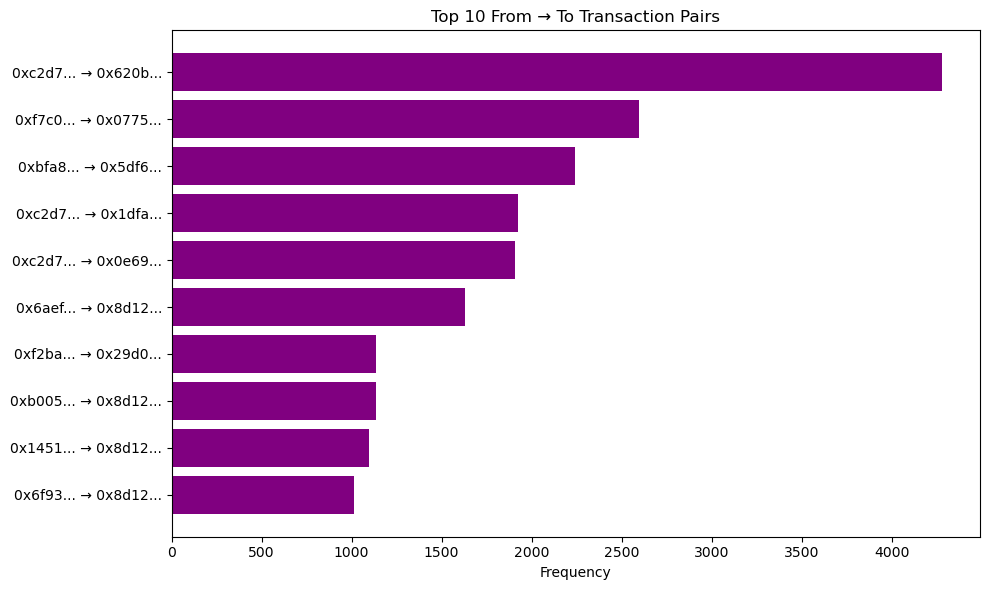

In [8]:
# Create a pivot-like summary: how many times each (From → To) pair occurs
pair_counts = df.groupby(['From', 'To']).size().reset_index(name='Count')
pair_counts = pair_counts.sort_values('Count', ascending=False)

print("Most Frequent Transaction Pairs:")
print(pair_counts.head(10))

# Visualize top 10 pairs
plt.figure(figsize=(10, 6))
top_pairs = pair_counts.head(10)
labels = [f"{row['From'][:6]}... → {row['To'][:6]}..." for _, row in top_pairs.iterrows()]
plt.barh(labels, top_pairs['Count'], color='purple')
plt.xlabel('Frequency')
plt.title('Top 10 From → To Transaction Pairs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Block Height vs. Time Consistency

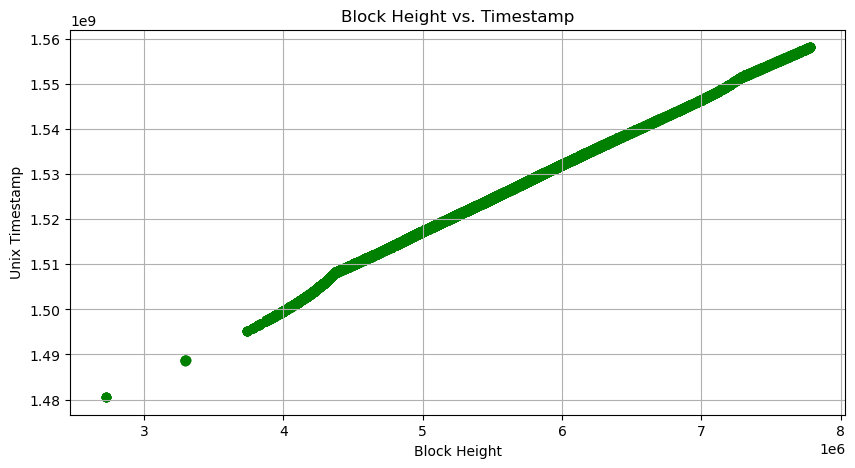

BlockHeight and TimeStamp are monotonically increasing: False


In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(df['BlockHeight'], df['TimeStamp'], alpha=0.7, color='green')
plt.title('Block Height vs. Timestamp')
plt.xlabel('Block Height')
plt.ylabel('Unix Timestamp')
plt.grid(True)
plt.show()

# Check monotonicity
is_monotonic = df['BlockHeight'].is_monotonic_increasing and df['TimeStamp'].is_monotonic_increasing
print(f"BlockHeight and TimeStamp are monotonically increasing: {is_monotonic}")

Fraud/Error Analysis (Even though all isError=0 now)

In [10]:
# In this sample, isError = 0 for all, but we prepare for future data
print("Unique values in 'isError':", df['isError'].unique())

# If fraud labels existed, we'd compare:
# - Value distribution by error status
# - Time patterns of errors
# - Address behavior in fraudulent vs. normal txns

# For now, simulate insight:
if df['isError'].nunique() == 1:
    print("\n⚠️ Warning: No fraud/error cases in current sample. Real dataset must contain labeled fraud.")

Unique values in 'isError': [0 1]


Address Reuse & Network Metrics (Simple)

In [11]:
# How many unique addresses?
total_addresses = set(df['From']).union(set(df['To']))
print(f"Total Unique Addresses: {len(total_addresses)}")
print(f"Senders: {df['From'].nunique()}, Receivers: {df['To'].nunique()}")

# Addresses that both send and receive (potential intermediaries)
common = set(df['From']) & set(df['To'])
print(f"Addresses that both send and receive: {len(common)}")

# Example: Is '0x002f0c81...' acting as a hub?
hub_candidate = '0x002f0c8119c16d310342d869ca8bf6ace34d9c39'
in_degree = (df['To'] == hub_candidate).sum()
out_degree = (df['From'] == hub_candidate).sum()
print(f"\nHub candidate {hub_candidate[:10]}... has in-degree={in_degree}, out-degree={out_degree}")

Total Unique Addresses: 45751
Senders: 37241, Receivers: 13392
Addresses that both send and receive: 4883

Hub candidate 0x002f0c81... has in-degree=9, out-degree=6


Correlation Heatmap (Numeric Features)

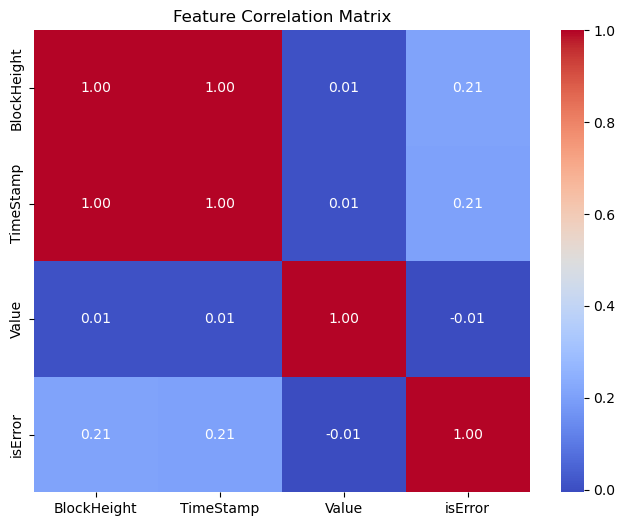

In [12]:
# Select numeric columns
numeric_df = df[['BlockHeight', 'TimeStamp', 'Value', 'isError']]

# Compute correlation
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()